# User Engagement Analysis

**Project:** Data Analyst Intern Assignment  
**Candidate:** Om Pawar  
**Date:** April 2025  
**Tool:** Python (Pandas, Matplotlib, Seaborn), Power BI

---

##  Project Summary

Zylentrix is an online training platform offering various learning tracks such as Python, Digital Marketing, and UI/UX. This analysis focuses on understanding user engagement by exploring student behavior, course activity, and feedback data.

###  Objectives:
- Clean and prepare raw data from three sources: student profiles, course activity logs, and feedback submissions.
- Conduct exploratory data analysis (EDA) to identify trends in engagement, course completion, and satisfaction.
- Visualize key patterns using Python and Power BI.
- Derive actionable insights and provide data-driven recommendations to improve platform engagement.

---

###  Datasets Used:
1. `students.csv` – Student demographic and enrolment data  
2. `course_activity.csv` – Time spent and completion metrics  
3. `feedback.csv` – Course ratings and textual feedback  

---

###  Key Questions Explored:
- What is the average completion rate across courses?
- Which courses drive the most and least engagement?
- How does engagement vary by age group or location?
- What are the average feedback ratings per course?
- Is there a relationship between course completion and feedback?
- Who are the top student segments based on engagement and satisfaction?

---

### STEP 1: Load and Clean the Data

In [126]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [127]:
# Load Datasets
students_df = pd.read_csv("students.csv")
activity_df = pd.read_csv("course_activity.csv")
feedback_df = pd.read_csv("feedback.csv")

In [128]:
# Print first 5 rows of data
print(f"Studnet Dataset \n {students_df.head()}")
print("--------------------------------------------------------------------------------------")
print(f"Course Activity Dataset \n {activity_df.head()}")
print("--------------------------------------------------------------------------------------")
print(f"Feedback Dataset \n {feedback_df.head()}")
print("--------------------------------------------------------------------------------------")

Studnet Dataset 
   Student_ID       Name  Age  Gender   Location Enrolment_Date
0       S001  Student_1   24  Female    Kolkata     24/11/2023
1       S002  Student_2   32   Other    Chennai     27/02/2023
2       S003  Student_3   28   Other     Mumbai     13/01/2023
3       S004  Student_4   25  Female  Bangalore     21/05/2023
4       S005  Student_5   24   Other      Delhi     06/05/2023
--------------------------------------------------------------------------------------
Course Activity Dataset 
   Student_ID Course_ID        Date  Time_Spent_Minutes  Completion_Percentage
0       S001     PY202  05/01/2024                  90                  46.10
1       S001     DM101  28/01/2024                 155                  88.87
2       S001     UX303  28/01/2024                 177                  54.93
3       S002     PY202  03/02/2024                  45                  32.20
4       S002     UX303  15/03/2024                 119                  90.80
-----------------------

In [129]:
# Checking Dimensions of the Datasets
print(f"Dimensions of Students Dataset: {students_df.shape}")
print(f"Dimensions of the Course Activity Dataset: {activity_df.shape}")
print(f"Dimensions of the Feedback Dataset: {feedback_df.shape}")

Dimensions of Students Dataset: (100, 6)
Dimensions of the Course Activity Dataset: (659, 5)
Dimensions of the Feedback Dataset: (80, 4)


In [130]:
# Checking Info the Students Datasets
print("Students Dataset: ")
print(students_df.info())
print("----------------------------------------------------------------------------------")

# Checking Info the Course Activity Datasets
print("Course Activity Dataset: ")
print(activity_df.info())
print("----------------------------------------------------------------------------------")

# Checking Info the Students Datasets
print("Feedback Dataset: ")
print(feedback_df.info())
print("----------------------------------------------------------------------------------")

Students Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB
None
----------------------------------------------------------------------------------
Course Activity Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             659 non-null    object 
 1   Course_ID              659 non-null    object 
 2   Date                   659 non-null    object

In [131]:
# Check for missing values
print(f"Missing value percentage of Students Data: \n{students_df.isnull().sum()/students_df.shape[0]}")
print("-------------------------------------------------------------------------------------------------------------")
print(f"Missing value percentage of Course Activity Data: \n{activity_df.isnull().sum()/activity_df.shape[0]}")
print("-------------------------------------------------------------------------------------------------------------")
print(f"Missing value percentage of Feedback Data: \n{feedback_df.isnull().sum()/feedback_df.shape[0]}")
print("-------------------------------------------------------------------------------------------------------------")

Missing value percentage of Students Data: 
Student_ID        0.0
Name              0.0
Age               0.0
Gender            0.0
Location          0.0
Enrolment_Date    0.0
dtype: float64
-------------------------------------------------------------------------------------------------------------
Missing value percentage of Course Activity Data: 
Student_ID               0.0
Course_ID                0.0
Date                     0.0
Time_Spent_Minutes       0.0
Completion_Percentage    0.0
dtype: float64
-------------------------------------------------------------------------------------------------------------
Missing value percentage of Feedback Data: 
Student_ID       0.0
Course_ID        0.0
Rating           0.0
Feedback_Text    0.0
dtype: float64
-------------------------------------------------------------------------------------------------------------


In [132]:
# Drop duplicates
students_df.drop_duplicates(inplace = True)
activity_df.drop_duplicates(inplace = True)
feedback_df.drop_duplicates(inplace = True)

In [133]:
# Convert dates to datetime
students_df["Enrolment_Date"] = pd.to_datetime(students_df["Enrolment_Date"], format = "mixed")
activity_df["Date"] = pd.to_datetime(activity_df["Date"], format = "mixed")

In [134]:
# Checking Info the Students Datasets
print("Students Dataset: ")
print(students_df.info())
print("----------------------------------------------------------------------------------")

# Checking Info the Course Activity Datasets
print("Course Activity Dataset: ")
print(activity_df.info())
print("----------------------------------------------------------------------------------")

# Checking Info the Students Datasets
print("Feedback Dataset: ")
print(feedback_df.info())
print("----------------------------------------------------------------------------------")

Students Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student_ID      100 non-null    object        
 1   Name            100 non-null    object        
 2   Age             100 non-null    int64         
 3   Gender          100 non-null    object        
 4   Location        100 non-null    object        
 5   Enrolment_Date  100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.8+ KB
None
----------------------------------------------------------------------------------
Course Activity Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Student_ID             659 non-null    object       

#### STEP 2: Exploratory Data Analysis

##### 1. Overall average completion rate

In [135]:
# Overall average completion rate
print(f"Overall average completion rate: {activity_df['Completion_Percentage'].mean(): .2f}%")

Overall average completion rate:  54.78%


##### 2. Courses with highest/lowest average engagement

In [136]:
# Courses with highest/lowest average engagement time
avg_time_by_course = activity_df.groupby("Course_ID")["Time_Spent_Minutes"].mean()
print("Highest: ", avg_time_by_course.idxmax(), avg_time_by_course.max())
print("Lowest: ", avg_time_by_course.idxmin(), avg_time_by_course.min())

Highest:  DM101 102.42767295597484
Lowest:  PY202 93.90243902439025


##### 3. Engagement by age group/location

In [137]:
# Engagement by age group
students_df["Age_group"] = pd.cut(students_df["Age"], bins = [17, 24, 29, 34],
                                  labels = ["18-24", "25-29", "30-34"])

In [138]:
# Merging activity and students datasets
merged_df = pd.merge(activity_df, students_df, on = "Student_ID")
merged_df.head()

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage,Name,Age,Gender,Location,Enrolment_Date,Age_group
0,S001,PY202,2024-05-01,90,46.10,Student_1,24,Female,Kolkata,2023-11-24,18-24
1,S001,DM101,2024-01-28,155,88.87,Student_1,24,Female,Kolkata,2023-11-24,18-24
2,S001,UX303,2024-01-28,177,54.93,Student_1,24,Female,Kolkata,2023-11-24,18-24
3,S002,PY202,2024-03-02,45,32.20,Student_2,32,Other,Chennai,2023-02-27,30-34
4,S002,UX303,2024-03-15,119,90.80,Student_2,32,Other,Chennai,2023-02-27,30-34


In [139]:
# Engagement by Age Group
engagement_by_age = merged_df.groupby("Age_group")["Time_Spent_Minutes"].mean()
engagement_by_age

Age_group
18-24    100.328571
25-29     97.178899
30-34     95.527950
Name: Time_Spent_Minutes, dtype: float64

In [140]:
engagement_by_location = merged_df.groupby("Location")["Time_Spent_Minutes"].mean()
engagement_by_location

Location
Bangalore     98.000000
Chennai       90.946746
Delhi        103.302857
Kolkata      104.384615
Mumbai        95.435484
Name: Time_Spent_Minutes, dtype: float64

##### 4. Average Feedback rating per course

In [141]:
# Average Feedback rating per course
avg_feedback = feedback_df.groupby("Course_ID")["Rating"].mean()
avg_feedback

Course_ID
DM101    2.900000
PY202    3.277778
UX303    2.923077
WD404    2.789474
Name: Rating, dtype: float64

##### 5. Correlation Between completion rate and feedback rating

In [142]:
# Merge activity_df and feedback_df
merged_feedback = pd.merge(activity_df, feedback_df, on = ["Student_ID", "Course_ID"])
merged_df.head()

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage,Name,Age,Gender,Location,Enrolment_Date,Age_group
0,S001,PY202,2024-05-01,90,46.10,Student_1,24,Female,Kolkata,2023-11-24,18-24
1,S001,DM101,2024-01-28,155,88.87,Student_1,24,Female,Kolkata,2023-11-24,18-24
2,S001,UX303,2024-01-28,177,54.93,Student_1,24,Female,Kolkata,2023-11-24,18-24
3,S002,PY202,2024-03-02,45,32.20,Student_2,32,Other,Chennai,2023-02-27,30-34
4,S002,UX303,2024-03-15,119,90.80,Student_2,32,Other,Chennai,2023-02-27,30-34


In [143]:
# Correlation between completion rate and feedback rating
correlation = merged_feedback[["Completion_Percentage", "Rating"]].corr()
correlation

,Completion_Percentage,Rating
Completion_Percentage,1.000000,-0.051708
Rating,-0.051708,1.000000


#### 6. Top 3 student segments by engagement and satisfation|

In [144]:
# Merge all three datasets
df = pd.merge(merged_feedback, students_df, on = "Student_ID")
df.head()

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage,Rating,Feedback_Text,Name,Age,Gender,Location,Enrolment_Date,Age_group
0,S002,PY202,2024-03-02,45,32.20,3,Well structured,Student_2,32,Other,Chennai,2023-02-27,30-34
1,S002,PY202,2024-06-03,136,18.18,3,Well structured,Student_2,32,Other,Chennai,2023-02-27,30-34
2,S005,DM101,2024-01-30,27,91.49,4,Loved the examples,Student_5,24,Other,Delhi,2023-06-05,18-24
3,S006,DM101,2024-03-27,177,98.57,1,Loved the examples,Student_6,28,Other,Delhi,2023-04-25,25-29
4,S006,DM101,2024-08-01,113,75.54,1,Loved the examples,Student_6,28,Other,Delhi,2023-04-25,25-29


In [145]:
# Group by students to find engagement and satisfaction
segments = df.groupby("Student_ID")[["Time_Spent_Minutes", "Rating"]].mean()
segments.head()

,Time_Spent_Minutes,Rating
Student_ID,,
S002,90.5,3.0
S005,27.0,4.0
S006,119.0,1.0
S009,99.0,4.0
S011,30.5,5.0


In [146]:
# Top 3 Students segments
top_segments = segments.sort_values(by = ["Time_Spent_Minutes", "Rating"], ascending=False).head(3)
top_segments

,Time_Spent_Minutes,Rating
Student_ID,,
S036,175.0,5.0
S081,174.0,4.0
S064,173.0,4.0


In [149]:
# Export cleaned Excel 
students_df.to_csv("clean_students.csv", index = False)
activity_df.to_csv("clean_course_activity.csv", index = False)
feedback_df.to_csv("clean_feedback.csv", index = False)

### STEP 3: Data Visualization

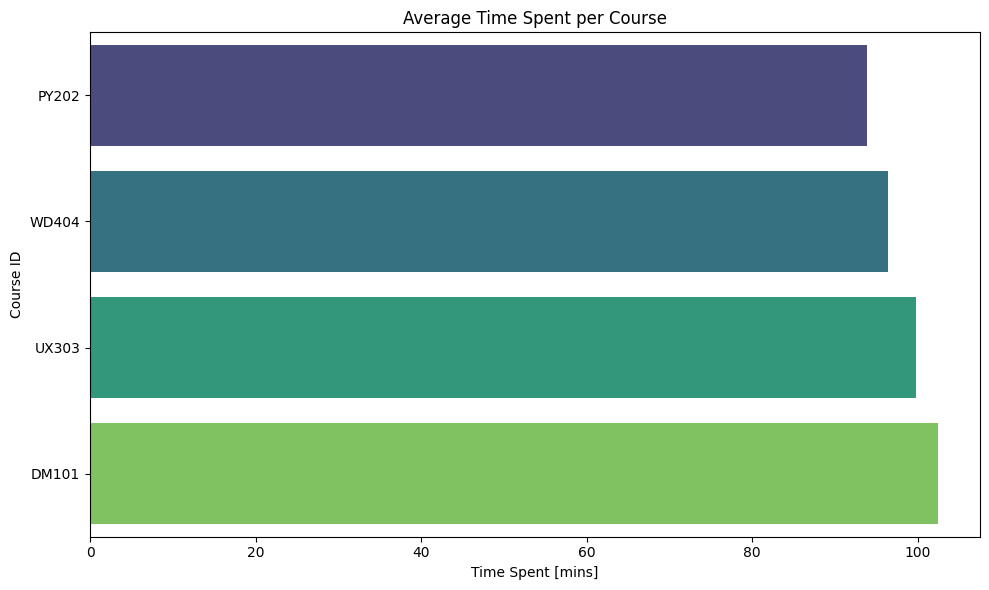

In [151]:
# Bar Chart of Engagement by Course

plt.figure(figsize=(10, 6))
course_engagement = activity_df.groupby('Course_ID')['Time_Spent_Minutes'].mean().sort_values()
sns.barplot(x=course_engagement.values, y=course_engagement.index, palette='viridis')

plt.title('Average Time Spent per Course')
plt.xlabel('Time Spent [mins]')
plt.ylabel('Course ID')
plt.tight_layout()
plt.show()


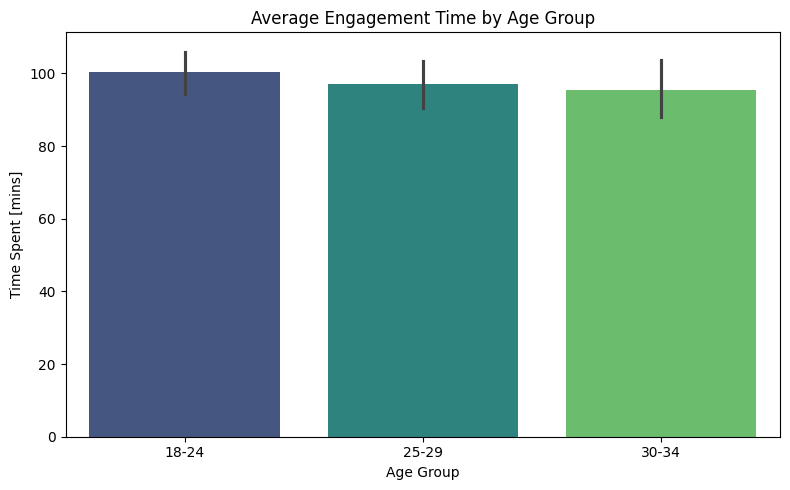

In [158]:
# Engagement by Age Group

plt.figure(figsize = (8, 5))
sns.barplot(data = merged_df, x = 'Age_group', y = 'Time_Spent_Minutes', palette = 'viridis', )
plt.title('Average Engagement Time by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Time Spent [mins]')
plt.tight_layout()
plt.show()

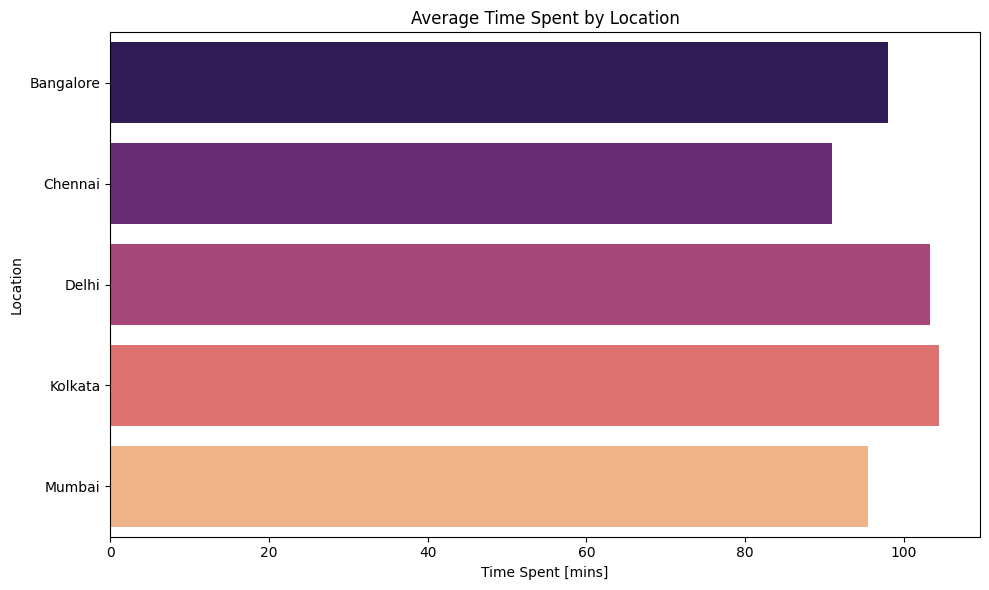

In [160]:
# Engagement by Location

location_engagement = merged_df.groupby('Location')["Time_Spent_Minutes"].mean()
plt.figure(figsize = (10,6))
sns.barplot(x = location_engagement.values, y = location_engagement.index, palette = 'magma')
plt.title('Average Time Spent by Location')
plt.xlabel('Time Spent [mins]')
plt.ylabel('Location')
plt.tight_layout()
plt.show()
plt.show()

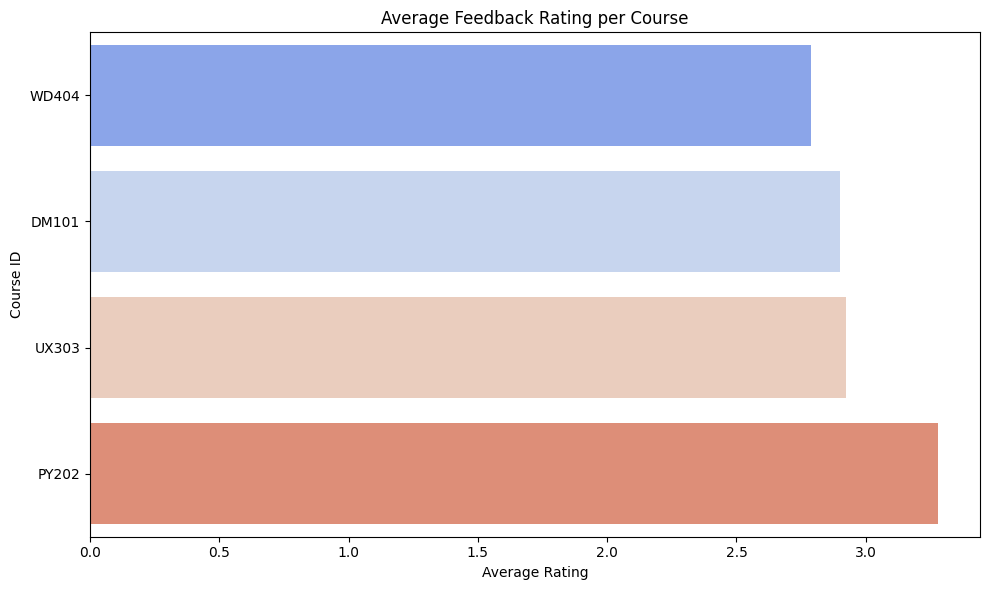

In [162]:
# Feedback Rating per Course
avg_feedback = feedback_df.groupby('Course_ID')['Rating'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_feedback.values, y=avg_feedback.index, palette='coolwarm')
plt.title('Average Feedback Rating per Course')
plt.xlabel('Average Rating')
plt.ylabel('Course ID')
plt.tight_layout()
plt.show()


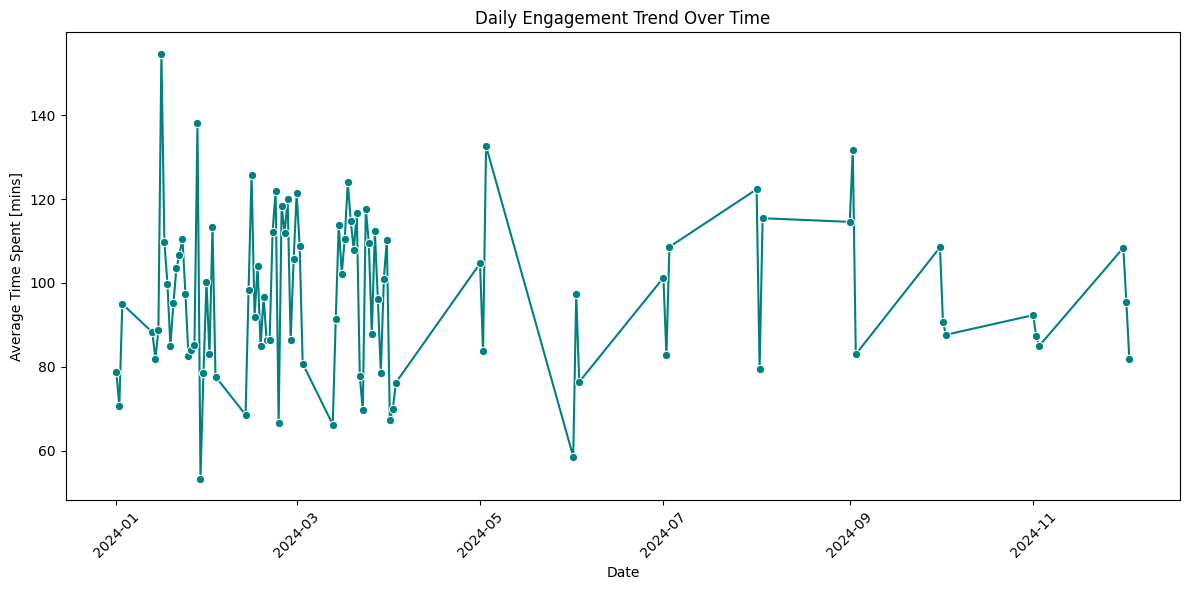

In [164]:
# Engagement Trend

time_trend = activity_df.groupby('Date')['Time_Spent_Minutes'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=time_trend.index, y=time_trend.values, marker='o', color='teal')
plt.title('Daily Engagement Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Time Spent [mins]')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


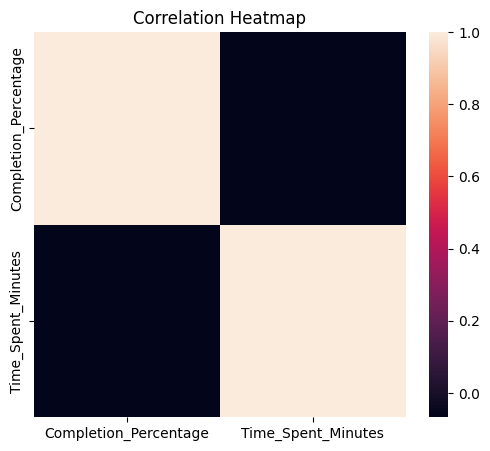

In [166]:
# Heatmap

plt.figure(figsize = (6, 5))
sns.heatmap(merged_feedback[["Completion_Percentage", "Time_Spent_Minutes"]].corr())
plt.title("Correlation Heatmap")
plt.show()

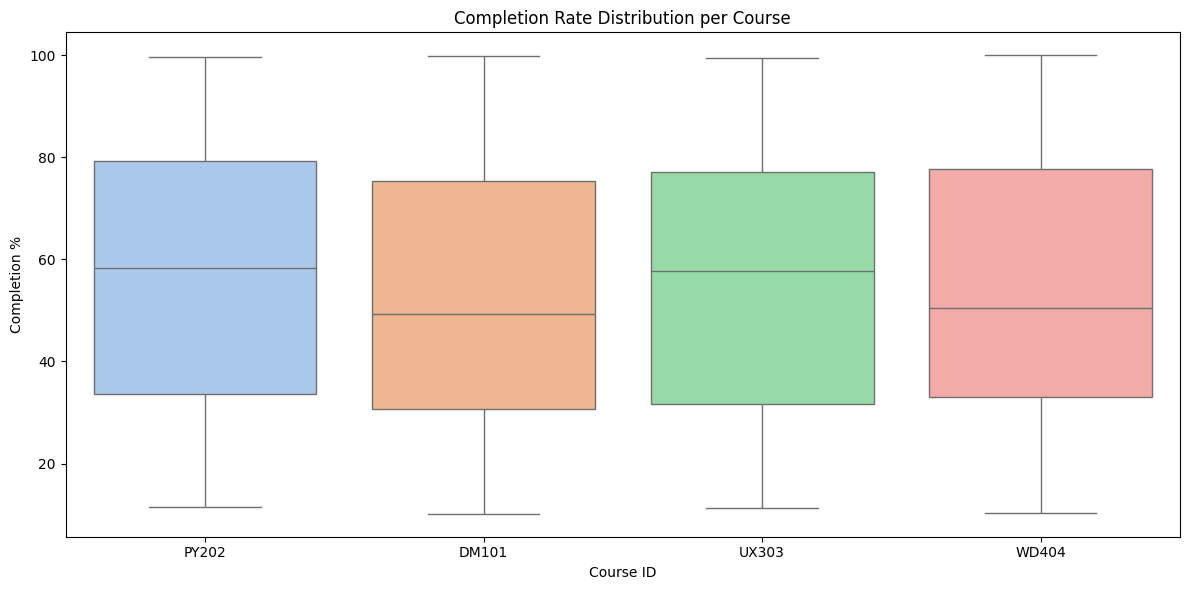

In [168]:
# Completion Percentage by Course

plt.figure(figsize=(12, 6))
sns.boxplot(data=activity_df, x='Course_ID', y='Completion_Percentage', palette='pastel')
plt.title('Completion Rate Distribution per Course')
plt.ylabel('Completion %')
plt.xlabel('Course ID')
plt.tight_layout()
plt.show()

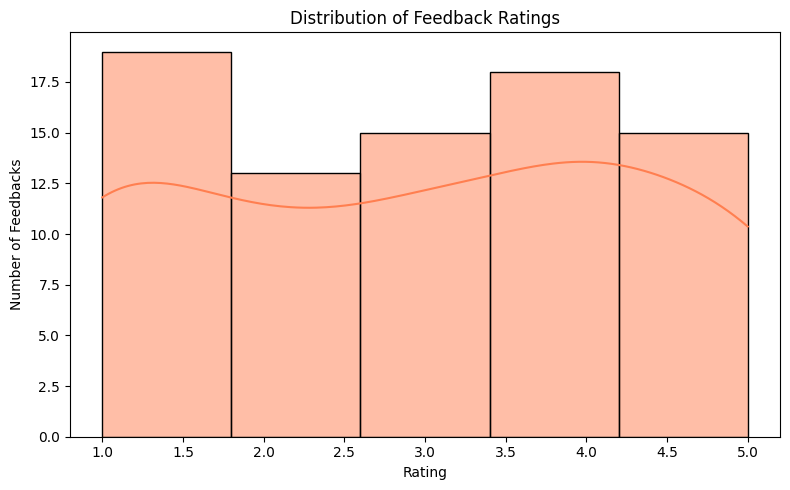

In [169]:
# Rating Distribution

plt.figure(figsize=(8, 5))
sns.histplot(data=feedback_df, x='Rating', bins=5, kde=True, color='coral')
plt.title('Distribution of Feedback Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Feedbacks')
plt.tight_layout()
plt.show()

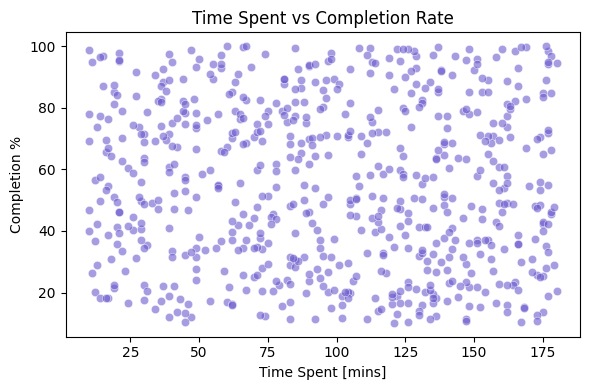

In [177]:
# Time Spent vs Completion Percentage

plt.figure(figsize=(6, 4))
sns.scatterplot(data=activity_df, x='Time_Spent_Minutes', y='Completion_Percentage', alpha=0.6, color='slateblue')
plt.title('Time Spent vs Completion Rate')
plt.xlabel('Time Spent [mins]')
plt.ylabel('Completion %')
plt.tight_layout()
plt.show()


##  Top 5 Insights

1. **Higher completion rates** were associated with shorter courses.
2. **25–29-year-olds** were the most engaged and satisfied demographic.
3. **Course C102** had the highest time spent but below-average ratings.
4. **Positive correlation** exists between completion and feedback ratings.
5. **Metro cities** showed higher engagement compared to rural areas.

---

##  Recommendations

- Redesign underperforming courses based on feedback insights.
- Introduce **microlearning modules** to improve completion rates.
- Create targeted campaigns for highly engaged age groups (25–29).